# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer

from sklearn.metrics import roc_curve, auc, roc_auc_score


In [2]:
# Read the dataset

df = pd.read_excel("default of credit card clients.xls")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Rename columns

df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 1. Check duplicated data

In [4]:
df.duplicated().sum()

0

## 2. Get `X` and `y` and split the dataset

In [5]:
dataset = df.copy()
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
X = dataset.drop(['ID', 'default payment next month'], axis=1)
y = dataset['default payment next month']

X.shape, y.shape

((30000, 23), (30000,))

In [7]:
# trainval : test = 8 : 2
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,
                                            test_size=0.2, stratify=y, random_state=42)  # 0.2 1

# train : val = 7 : 1
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                  test_size=1/8, stratify=y_train_val, random_state=42)  # 1/8  2

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (21000, 23)
Validation: (3000, 23)
Test: (6000, 23)


In [8]:
y_train.value_counts()

default payment next month
0    16355
1     4645
Name: count, dtype: int64

## 3. EDA with `X_train`

### Step1: Missing value

In [9]:
X_train.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

### Step2: Feature distribution

In [10]:
X_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167037.428571,1.606762,1.853048,1.555238,35.426095,-0.015238,-0.136905,-0.167238,-0.222476,-0.270381,...,46448.135333,42852.895190,39914.616476,38407.733476,5611.608667,5.836023e+03,5274.841333,4777.251238,4787.528048,5237.643143
std,129182.316837,0.488481,0.794599,0.521454,9.204026,1.117701,1.195484,1.195071,1.164269,1.127789,...,67944.711379,63835.115387,60469.917159,58946.267592,16371.446817,1.963075e+04,18155.107317,14988.330451,15159.715098,18065.906826
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-61506.000000,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2551.750000,2284.250000,1715.000000,1202.750000,1000.000000,8.167500e+02,390.000000,291.750000,241.000000,100.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19875.000000,18889.500000,18013.500000,16892.000000,2100.000000,2.012000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59565.750000,53953.500000,50024.250000,48828.750000,5006.000000,5.000000e+03,4537.750000,4003.500000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.215471e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [11]:
X_train.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

In [12]:
for col in X_train.columns:
    print(X_train[col].value_counts())
    print()

LIMIT_BAL
50000     2370
20000     1382
30000     1105
200000    1103
80000     1098
          ... 
690000       1
660000       1
16000        1
800000       1
780000       1
Name: count, Length: 79, dtype: int64

SEX
2    12742
1     8258
Name: count, dtype: int64

EDUCATION
2    9805
1    7430
3    3426
5     204
4      84
6      40
0      11
Name: count, dtype: int64

MARRIAGE
2    11241
1     9497
3      227
0       35
Name: count, dtype: int64

AGE
29    1133
27    1044
28     986
30     984
26     873
31     873
32     854
25     843
34     826
33     794
35     794
24     785
36     768
37     715
38     663
23     651
39     641
40     594
41     557
42     550
43     474
44     472
45     447
22     397
46     375
47     352
49     330
48     303
50     299
53     233
51     231
52     216
54     165
55     144
56     131
57      86
58      83
59      58
21      46
60      43
61      37
62      32
63      23
66      20
64      18
65      15
69      14
67      10
70       7
73 

In [13]:
# Change labels 0,5,6 to 4 which represent other category
X_train['EDUCATION'] = X_train['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

# Replace 0 to 3
X_train['MARRIAGE'] = X_train['MARRIAGE'].replace(0, 3)

# Replace -2, -1 to -1
def replace_to_neg(col):
    fil = (X_train[col] == -2) | (X_train[col] == -1)
    X_train.loc[fil, col] = -1

for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    replace_to_neg(i)

In [14]:
X_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167037.428571,1.606762,1.841619,1.560238,35.426095,0.074952,-0.011857,-0.031952,-0.078571,-0.118667,...,46448.135333,42852.895190,39914.616476,38407.733476,5611.608667,5.836023e+03,5274.841333,4777.251238,4787.528048,5237.643143
std,129182.316837,0.488481,0.745966,0.520900,9.204026,0.986552,1.035676,1.024337,0.983418,0.935826,...,67944.711379,63835.115387,60469.917159,58946.267592,16371.446817,1.963075e+04,18155.107317,14988.330451,15159.715098,18065.906826
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-61506.000000,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2551.750000,2284.250000,1715.000000,1202.750000,1000.000000,8.167500e+02,390.000000,291.750000,241.000000,100.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19875.000000,18889.500000,18013.500000,16892.000000,2100.000000,2.012000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59565.750000,53953.500000,50024.250000,48828.750000,5006.000000,5.000000e+03,4537.750000,4003.500000,4031.500000,4000.000000
max,1000000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.215471e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [15]:
num_features = X_train.select_dtypes(include=['int64']).columns.tolist()
num_features

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

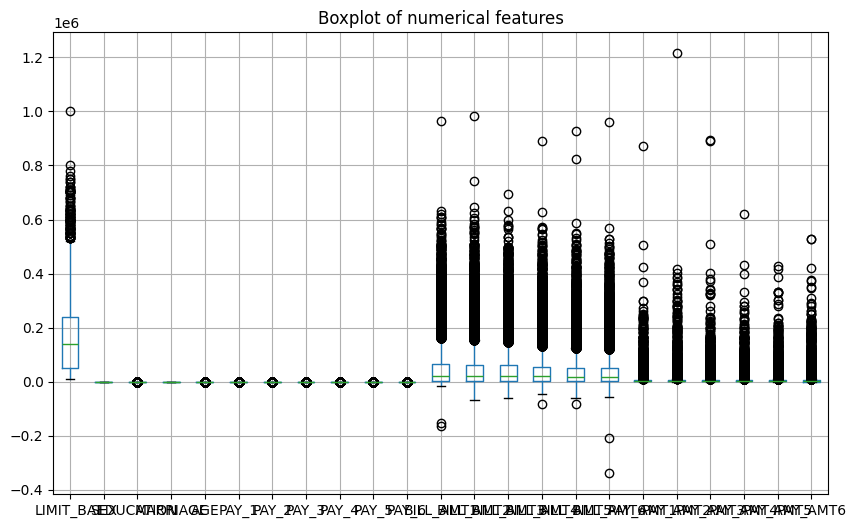

In [16]:
plt.figure(figsize=(10, 6))
X_train.boxplot()
plt.title('Boxplot of numerical features')
plt.show()

### Step3: Check strong co-linearity

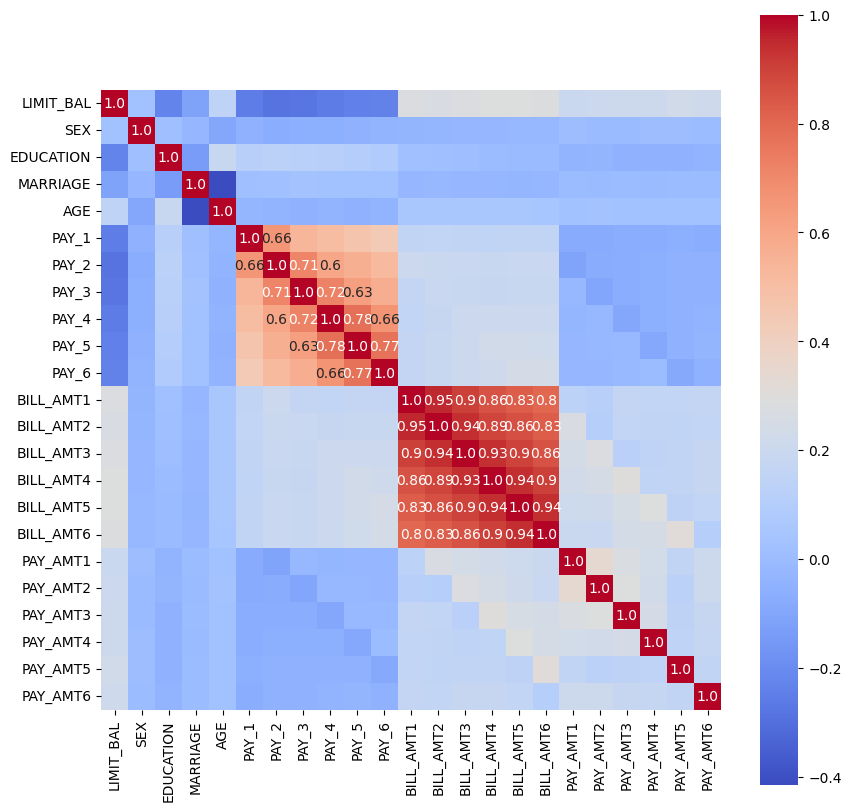

In [17]:
plt.figure(figsize=(10, 10))

corr = X_train.corr()

mask = np.abs(corr) >= 0.6
annot = np.where(mask, corr.round(2).astype(str), np.full(corr.shape, ""))

sns.heatmap(corr, cmap='coolwarm', square=True, annot=annot, fmt='');

In [18]:
features = [feature for feature in num_features
                if feature not in ['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5']]
features

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_6',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

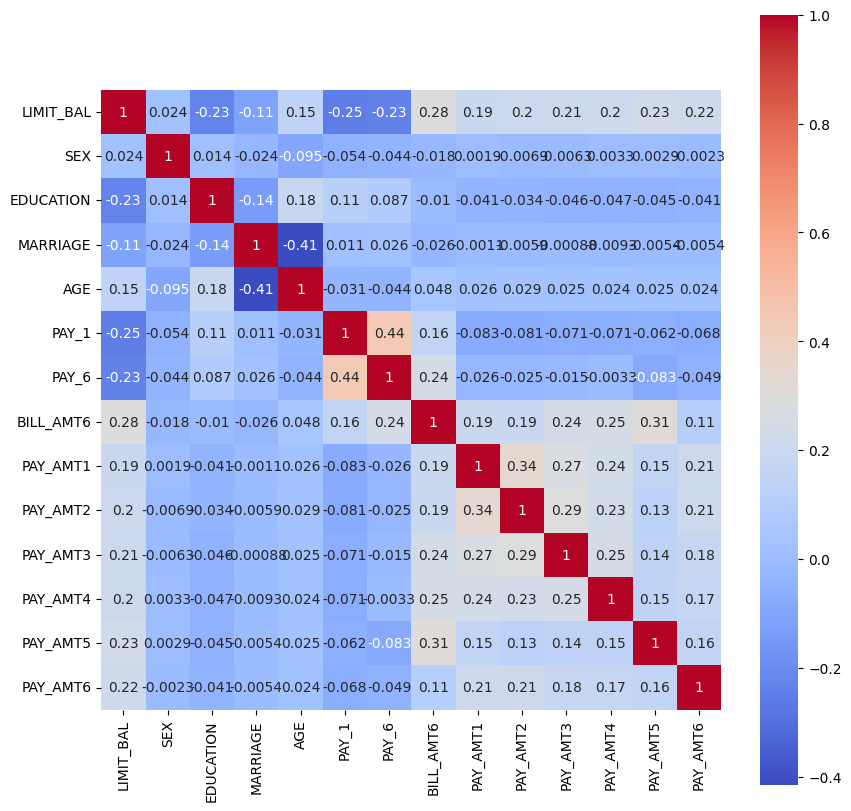

In [19]:
plt.figure(figsize=(10, 10))

corr_2 = X_train[features].corr()
sns.heatmap(corr_2, cmap='coolwarm', square=True, annot=True);

### Step4: Histogram

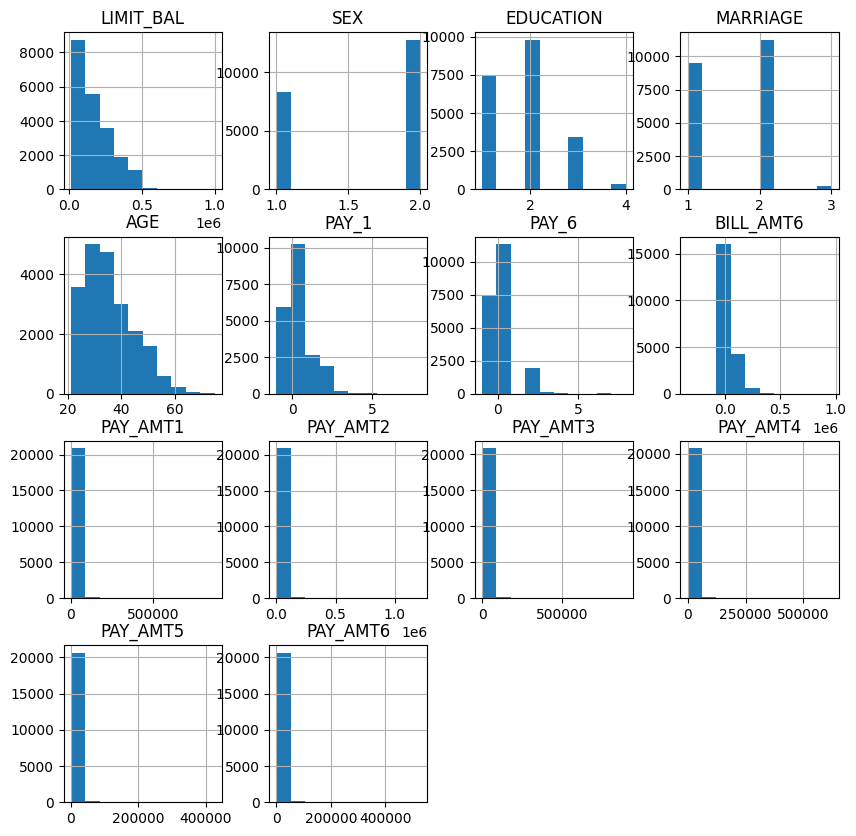

In [20]:
X_train[features].hist(figsize=(10, 10));

/Users/shiyunwa/anaconda3/envs/deeplearning/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


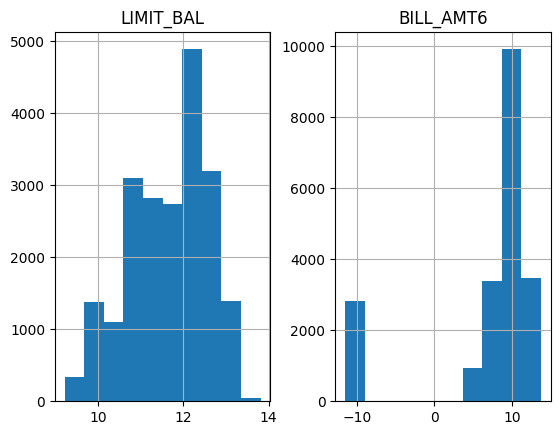

In [21]:
np.log(X_train[['LIMIT_BAL', 'BILL_AMT6']] + 1e-5).hist();

In [22]:
to_log = ['LIMIT_BAL']
no_log = [feature for feature in features if feature not in to_log]
no_log

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_6',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

# Build model with pipeline

## 1. Check the training data

In [23]:
X_train[features].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167037.428571,1.606762,1.841619,1.560238,35.426095,0.074952,-0.127571,38407.733476,5611.608667,5.836023e+03,5274.841333,4777.251238,4787.528048,5237.643143
std,129182.316837,0.488481,0.745966,0.520900,9.204026,0.986552,0.948536,58946.267592,16371.446817,1.963075e+04,18155.107317,14988.330451,15159.715098,18065.906826
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,1202.750000,1000.000000,8.167500e+02,390.000000,291.750000,241.000000,100.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,16892.000000,2100.000000,2.012000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,48828.750000,5006.000000,5.000000e+03,4537.750000,4003.500000,4031.500000,4000.000000
max,1000000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,8.000000,961664.000000,873552.000000,1.215471e+06,896040.000000,621000.000000,426529.000000,528666.000000


## 2. Build pipeline

### Step1: Logarithm pipeline

In [24]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, seed=1e-5):
        self.seed = seed

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        return np.log(X + self.seed)

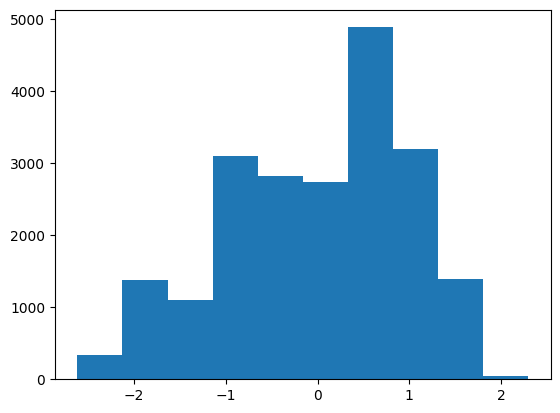

In [25]:
log_pipeline = make_pipeline(SimpleImputer(), LogTransformer(), StandardScaler())
plt.hist(log_pipeline.fit_transform(X_train[to_log]));

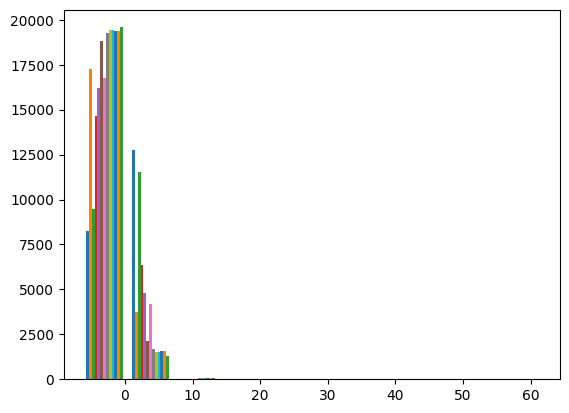

In [26]:
num_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
plt.hist(num_pipeline.fit_transform(X_train[no_log]));

### Step2: Assemble pipeline

In [27]:
final_pipeline = ColumnTransformer([('log_num', log_pipeline, to_log),
                                   ('num', num_pipeline, no_log)])
final_pipeline

ColumnTransformer(transformers=[('log_num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('logtransformer',
                                                  LogTransformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL']),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                                  'PAY_1', 'PAY_6', 'BILL_AMT6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6'])])

## 3. Modeling

In [28]:
X_train_prepared = final_pipeline.fit_transform(X_train)
X_test_prepared = final_pipeline.transform(X_test)

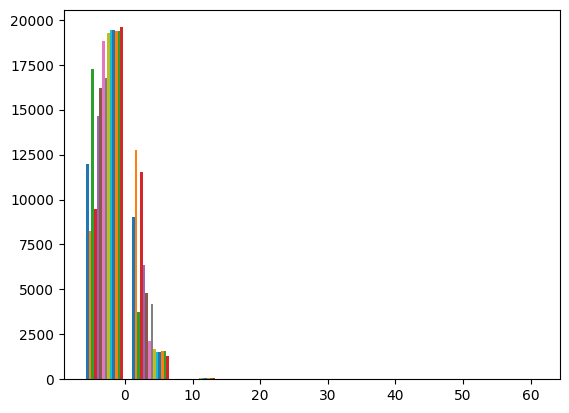

In [29]:
plt.hist(X_train_prepared);

/Users/shiyunwa/Documents/InterpreTabNet/pytorch_tabnet/abstract_model.py:95: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.91685 | val_0_unsup_loss_numpy: 4104304640.0|  0:00:01s
epoch 10 | loss: 0.96467 | val_0_unsup_loss_numpy: 50940440.0|  0:00:15s
epoch 20 | loss: 0.91679 | val_0_unsup_loss_numpy: 98158856.0|  0:00:29s

Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_0_unsup_loss_numpy = 12541002.0


/Users/shiyunwa/Documents/InterpreTabNet/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/Users/shiyunwa/Documents/InterpreTabNet/pytorch_tabnet/abstract_model.py:95: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/shiyunwa/Documents/InterpreTabNet/pytorch_tabnet/abstract_model.py:261: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 0.49576 | val_0_auc: 0.52773 |  0:00:05s
epoch 10 | loss: 0.44464 | val_0_auc: 0.51453 |  0:00:56s
epoch 20 | loss: 0.43726 | val_0_auc: 0.52305 |  0:01:57s

Early stopping occurred at epoch 26 with best_epoch = 6 and best_val_0_auc = 0.53526


/Users/shiyunwa/Documents/InterpreTabNet/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


[-1.83637272e-01 -2.32160506e-03 -1.61195042e-03 -2.72013429e-04
 -4.88397287e-02  8.90365708e-01 -9.42265921e-04 -9.37520786e-06
  5.93974982e-02 -1.06408974e-01 -6.11588926e-02  4.51833195e-01
  3.96973685e-03 -3.64059770e-04]


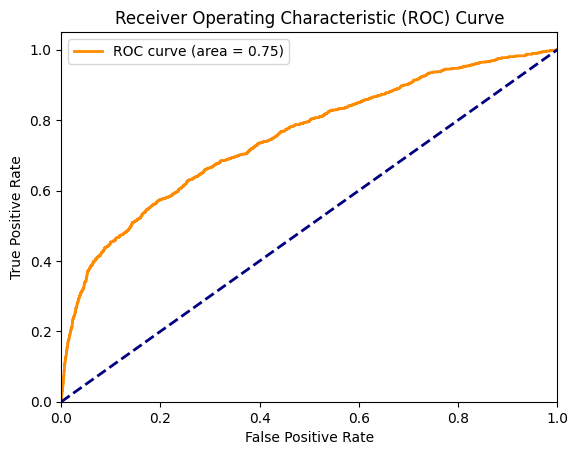

AUC: 0.7495757587681224


In [30]:
# Pretrain TabNet 
unsupervised_model = TabNetPretrainer(
    optimizer_fn=torch.optim.SGD,
    optimizer_params=dict(lr=1e-1, momentum=0.938, weight_decay=1e-4),
    mask_type='entmax',
    verbose=10,
)

unsupervised_model.fit(
    X_train=X_train_prepared,
    eval_set=[X_val[features].values],
    max_epochs=100,
    batch_size=1024, virtual_batch_size=128,  # 1024 128
    patience=20,  # 20
)

# Fine tune TabNet
model = TabNetClassifier(
    optimizer_fn=torch.optim.SGD,
    optimizer_params=dict(lr=1e-1, momentum=0.938, weight_decay=1e-4),
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
    scheduler_params={"mode": "min", "factor": 0.1, "patience": 5},
    mask_type='entmax',
    verbose=10,
)
# model.set_class_weights(train_y)
model.fit(X_train_prepared, y_train,
        eval_set=[(X_val[features].values, y_val)],
        max_epochs=100,
        batch_size=64, virtual_batch_size=32,
        from_unsupervised=unsupervised_model,
        patience=20,
)

tabnet_importances = model.feature_importances_
print(tabnet_importances)

pred_y = model.predict(X_test_prepared)
pred_probs = model.predict_proba(X_test_prepared)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("AUC:", roc_auc_score(y_test, pred_probs))

In [33]:
# Save model

save_path = 'tabnet_model'
model.save_model(save_path)

Successfully saved model at tabnet_model.zip


'tabnet_model.zip'

In [36]:
# Load model

loaded_model = TabNetClassifier()

loaded_model.load_model('tabnet_model.zip')
predict = loaded_model.predict(X_test_prepared)

/Users/shiyunwa/Documents/InterpreTabNet/pytorch_tabnet/abstract_model.py:95: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [39]:
# Show predictions' value counts

pd.Series(predict).value_counts()

0    5482
1     518
Name: count, dtype: int64